In [1]:
#!pip install yfinance
#!pip install vectorbt

In [2]:
import vectorbt as vbt
import pandas_ta as ta
import pandas as pd
import warnings
import numpy as np

warnings.simplefilter(action='ignore',category=FutureWarning)
pd.set_option("display.max_rows",1000)

In [3]:
origin_df = pd.read_csv('BTCUSTD15m_2023.csv')
#print(origin_df.info())
len(origin_df)

1152

In [4]:
df=origin_df.copy()
df.head(5)

Unnamed: 0       datetime      open      high       low     close
0  2023-01-03 00:00:00  1672675200000  16734.66  16739.64  16718.79  16734.81
1  2023-01-03 00:15:00  1672676100000  16734.81  16737.51  16729.85  16731.90
2  2023-01-03 00:30:00  1672677000000  16731.56  16738.55  16729.43  16732.70
3  2023-01-03 00:45:00  1672677900000  16732.70  16735.10  16708.23  16710.88
4  2023-01-03 01:00:00  1672678800000  16710.69  16716.66  16707.12  16711.00

In [5]:
atr_times=1.5

rsi = ta.rsi(df['close'],length=14)
ma5=ta.sma(df['close'],length=5)
ma10=ta.sma(df['close'],length=10)
ma20=ta.sma(df['close'],length=20)
atr=ta.atr(df['high'],df['low'],df['close'],length=14)
df['high_atr']=df['high']+atr*atr_times
df['low_atr']=df['low']-atr*atr_times

df.head(5)

Unnamed: 0       datetime      open      high       low     close  \
0  2023-01-03 00:00:00  1672675200000  16734.66  16739.64  16718.79  16734.81   
1  2023-01-03 00:15:00  1672676100000  16734.81  16737.51  16729.85  16731.90   
2  2023-01-03 00:30:00  1672677000000  16731.56  16738.55  16729.43  16732.70   
3  2023-01-03 00:45:00  1672677900000  16732.70  16735.10  16708.23  16710.88   
4  2023-01-03 01:00:00  1672678800000  16710.69  16716.66  16707.12  16711.00   

   high_atr  low_atr  
0       NaN      NaN  
1       NaN      NaN  
2       NaN      NaN  
3       NaN      NaN  
4       NaN      NaN

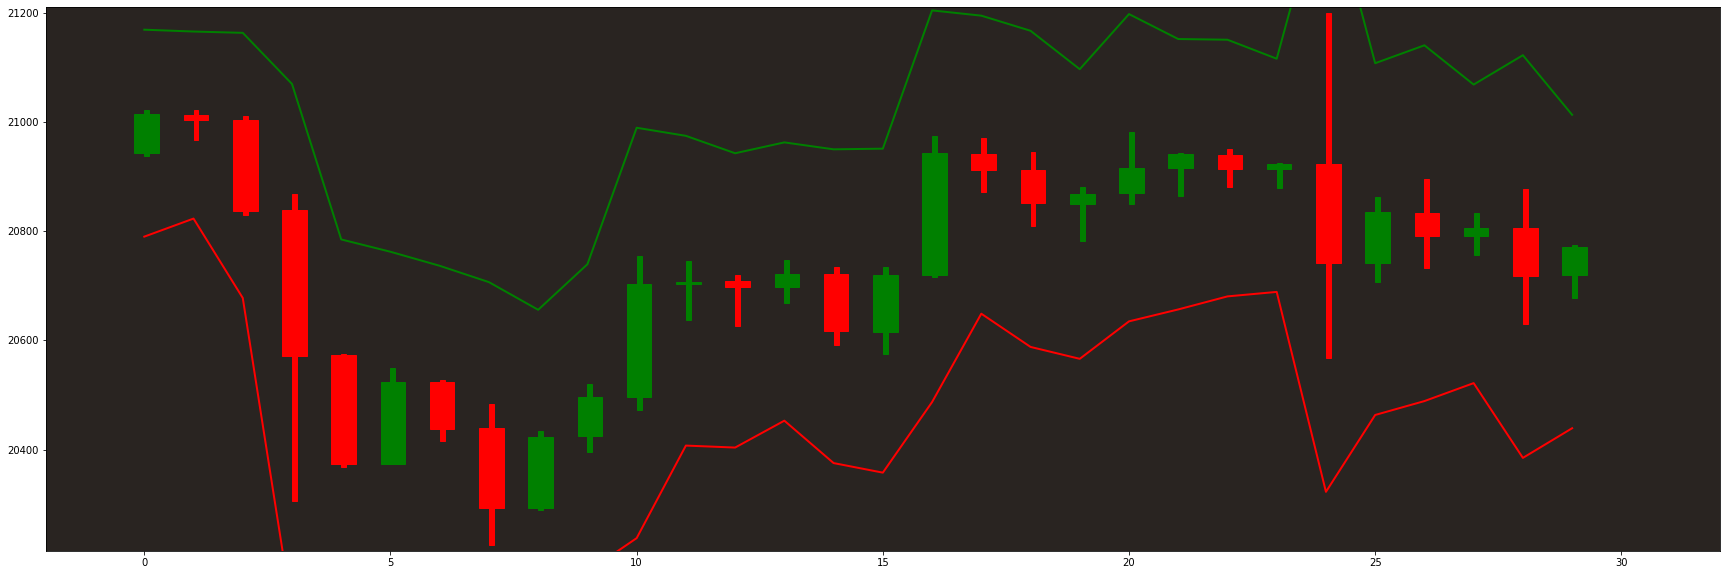

In [6]:
from pylab import *

fig, ax = plt.subplots(figsize = (30, 10))
ax.set_facecolor((41/255, 36/255, 33/255))

length=30


data=df[['open','high','low','close','high_atr','low_atr']][-length:]
#print(data)

plt.xlim([-2, length+2])
plt.ylim([data['low'].min()-10, data['high'].max()+10])

for i in range(len(data)):

    if data['open'].iloc[i]-data['close'].iloc[i] >0:
        c='r'
    else:
        c='g'

    rect = matplotlib.patches.Rectangle((i-0.2,data['close'].iloc[i]),0.5, data['open'].iloc[i]-data['close'].iloc[i],color=c)
    ax.add_patch(rect)
    rect = matplotlib.patches.Rectangle((i+0.2-0.2,data['low'].iloc[i]),0.1, data['high'].iloc[i]-data['low'].iloc[i],color=c)
    ax.add_patch(rect)

plt.plot(list(data['high_atr']),linewidth='2',color='g')
plt.plot(list(data['low_atr']),linewidth='2',color='r')


In [7]:
data['close'].iloc[0]

21014.98

4.945371150970459


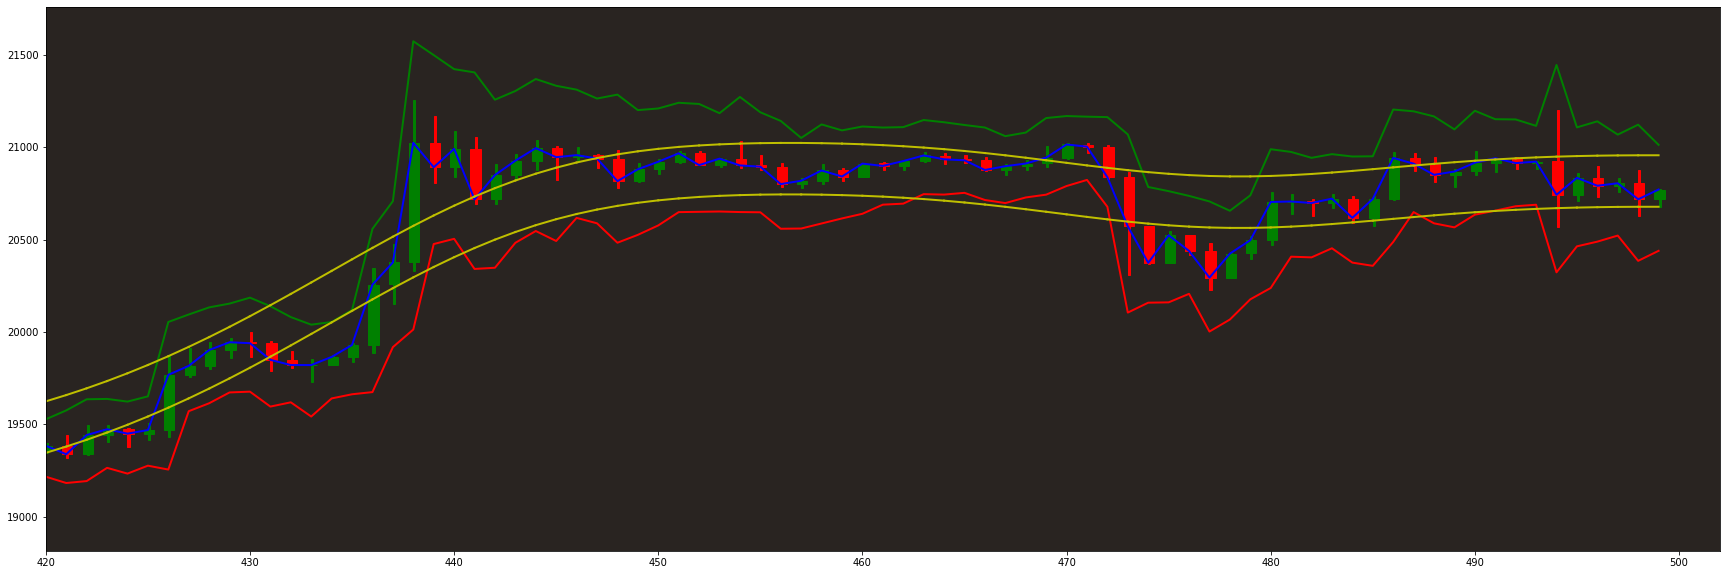

In [8]:
from pylab import *
import math
import time


fig, ax = plt.subplots(figsize = (30, 10))
ax.set_facecolor((41/255, 36/255, 33/255))


t1=time.time()

length=500
data_length=500

h=8
mult=2.5
k=2

data=df[['open','high','low','close','high_atr','low_atr']][-500:]


for i in range(len(data)):

    if data['open'].iloc[i]-data['close'].iloc[i] >0:
        c='r'
    else:
        c='g'

    rect = matplotlib.patches.Rectangle((i-0.2,data['close'].iloc[i]),0.5, data['open'].iloc[i]-data['close'].iloc[i],color=c)
    ax.add_patch(rect)
    rect = matplotlib.patches.Rectangle((i+0.2-0.2,data['low'].iloc[i]),0.1, data['high'].iloc[i]-data['low'].iloc[i],color=c)
    ax.add_patch(rect)

plt.plot(list(data['high_atr']),linewidth='2',color='g')
plt.plot(list(data['low_atr']),linewidth='2',color='r')
plt.plot(list(data['close']),linewidth='2',color='b')


y = []
sum_e = 0.
for i in range(length):
    sum = 0.
    sumw = 0.
    for j in range(length):
        w = math.exp(-(math.pow(i-j,2)/(h*h*2)))
        sum += data['close'].iloc[j]*w
        sumw += w
    y2 = sum/sumw
    sum_e += abs(data['close'].iloc[i] - y2)
    y.append(y2)
mae = sum_e/length*mult
for i in range(length-1):
    y1 = y[-i-2]
    y2 = y[-i-1]
    #print(y1,y2)
    
    plt.plot([500-i-2,500-i-1],[y1+mae,y2+mae],linewidth='2',color='y')
    plt.plot([500-i-2,500-i-1],[y1-mae,y2-mae],linewidth='2',color='y')

plt.xlim([420, length+2])
plt.ylim([data['low'][420:].min()-500, data['high'][420:].max()+500])


print(time.time()-t1)



In [9]:
from binance.spot import Spot 
import pandas as pd
import datetime


client = Spot()

# Get server timestamp
print(client.time())

start = str(int(datetime.datetime(2023,1,3).timestamp()*1000))
end = str(int(datetime.datetime(2023,1,15).timestamp()*1000))

print(start)
print(end)
print(int(end)-int(start))
print((int(end)-int(start))/(15*60*1000))
print((int(end)-int(start))/(15*60*1000)/1000)

batchs=int((int(end)-int(start))/(15*60*1000)/1000)+1
print(batchs)

m15=15*60*1000 #15分鐘轉換成毫秒

for i in range(batchs+1):
    print("batch=",i)
    if i == 0:
        new_start=int(start)+m15*i*1000
        new_end=int(start)+m15*(i+1)*1000
        df=pd.DataFrame(client.klines("BTCUSDT", "15m",limit=1000,startTime=str(new_start),endTime=str(new_end)))

    if i < batchs and i > 0:
        new_start=int(start)+m15*i*1000
        new_end=int(start)+m15*(i+1)*1000
        df=pd.concat([df,pd.DataFrame(client.klines("BTCUSDT", "15m",limit=1000,startTime=str(new_start),endTime=str(new_end)))],axis=0)
    if i == batchs:
        new_start=int(start)+m15*i*1000
        new_end=end
        df=pd.concat([df,pd.DataFrame(client.klines("BTCUSDT", "15m",limit=1000,startTime=str(new_start),endTime=str(new_end)))],axis=0)

print(len(df))
df.columns = ['datetime', 'open', 'high', 'low', 'close', 'volume','close_time', 'qav', 'num_trades','taker_base_vol', 'taker_quote_vol', 'ignore']

df=df[['datetime', 'open', 'high', 'low', 'close']]
df.index = [datetime.datetime.fromtimestamp(x/1000.0) for x in df.datetime]


17315.6

1673754800.1674194